<a href="https://colab.research.google.com/github/thierrysayah/database-project/blob/master/EndToEndProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import os
import tarfile
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
    
fetch_housing_data()


In [48]:

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)



In [49]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


   index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   
6      6    -122.25     37.84                52.0       2535.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   
6           489.0      1094.0       514.0         3.6591            299200.0   

  ocean_proximity         id income_cat  
0        NEAR BAY -122192.12          5  
1        NEAR BAY -122182.14          

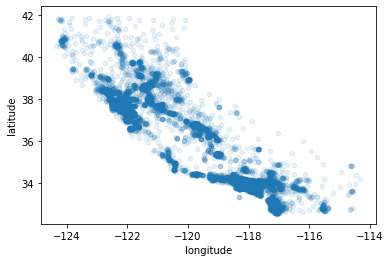

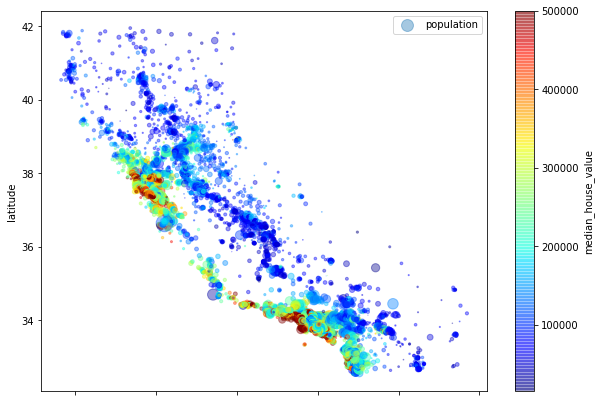

In [55]:
# VIEW DATASET INFO
print((housing.head()))
housing.info()
 # housing.hist(bins=50, figsize=(20, 15))
# print(housing["median_income"].max())
# plt.show()

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff  < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda  id_:test_set_check(id_,test_ratio))
    return data.loc[-in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index() # adds an index column
housing_with_id["id"] = housing["longitude"]*1000+ housing["latitude"]

train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"index")

# # Other method for splitting train test sets
# from sklearn.model_selection import train_test_split
# train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

housing = train_set.copy()
housing.plot(kind="scatter", x = "longitude", y = "latitude",alpha=0.1)
plt.show()

housing.plot(kind="scatter", x = "longitude", y = "latitude",alpha=0.4,
             s = housing["population"]/100, label= "population", figsize=(10,7),
             c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar =True,
             )
plt.show()


In [56]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0.,1.5,3.0,4.5,6.,np.inf],
                               labels = [1,2,3,4,5])

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1 ,test_size = 0.2, random_state =42)
for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [57]:
for set_ in (strat_test_set, strat_train_set):
  set_.drop("income_cat",axis = 1, inplace = True)

In [58]:
housing = strat_train_set.copy()
corr_matrix = housing.corr()
print(corr_matrix)

                     level_0     index  longitude  latitude  \
level_0             1.000000  1.000000  -0.116081  0.081974   
index               1.000000  1.000000  -0.116081  0.081974   
longitude          -0.116081 -0.116081   1.000000 -0.923924   
latitude            0.081974  0.081974  -0.923924  1.000000   
housing_median_age -0.178770 -0.178770  -0.111193  0.013277   
total_rooms         0.056507  0.056507   0.045360 -0.038442   
total_bedrooms      0.027335  0.027335   0.071664 -0.071176   
population          0.020304  0.020304   0.102958 -0.114159   
households          0.026127  0.026127   0.057817 -0.075751   
median_income       0.066772  0.066772  -0.019573 -0.076642   
median_house_value  0.072401  0.072401  -0.050673 -0.140753   
id                  0.292314  0.292314   0.203156 -0.290506   

                    housing_median_age  total_rooms  total_bedrooms  \
level_0                      -0.178770     0.056507        0.027335   
index                        -0.178770

In [59]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [60]:
# # Dealing with missing values
# housing.dropna(subset=["total_bedroom"]) # Option 1: drop districts with no values for total bedroom
# housing.drop("total_bedroom", axis =1) #  Option 2: drop whole attribute
# median = housing["total_bedrooms"].median() # Option 3: set missing values to some value
# housing["total_bedroom"].fillna(median, inplace =True) # option 3 continued

In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
# we need to drop none numerical values for imputer to work
housing_num = housing.drop("ocean_proximity", axis= 1)
imputer.fit(housing_num) # calculate median for each attribute
imputer.statistics_
housing_num.median().values

X = imputer.transform(housing_num) # replace missing values using imputer

housing_tr = pd.DataFrame(X,columns = housing_num.columns, index = housing_num.index) # transform from numpy array to dataframe

In [62]:
# housing[["ocean_proximity"]].head(10)

In [63]:
# dealing with none numerical data
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10) 

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [3.]])

In [64]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<13209x5 sparse matrix of type '<class 'numpy.float64'>'
	with 13209 stored elements in Compressed Sparse Row format>

In [65]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [66]:
# create custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [85]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OneHotEncoder(),cat_attribs),])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape)

(13209, 19)


In [69]:
# Train linear reg model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [70]:
# predict on some data
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [286998.94776466 303300.68602284  80861.55565335 123482.62545374
 206498.847043  ]
Labels: [336700.0, 340900.0, 61900.0, 100000.0, 275000.0]


In [83]:
# print(housing_labels.shape)

(13209,)


In [86]:
# Measure RMSE
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
# print(housing_predictions.shape)
lin_mse =  mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68510.86139157627


In [91]:
# decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

RMSE of decision tree is 0 due to overfitting, we can check for this using validation sets.

In [95]:
# check scores for Decision tree regressor
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores= np.sqrt(-scores)

def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard Deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [69649.68775    70713.37856971 75130.4881684  65835.21038166
 70012.01222798 68353.15961765 72342.64404461 70420.07247015
 67437.40630059 67297.32953778]
Mean:  69719.13890685265
Standard Deviation:  2564.3354531927903


In [97]:
# check scores for Decision tree regressor
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [68554.69266983 68454.08230077 68720.08586118 68638.65446355
 66121.92635446 67456.38434391 71828.4175259  68517.70506927
 69189.14716621 69219.45575537]
Mean:  68670.0551510445
Standard Deviation:  1363.7873743334183


In [98]:
# Try random forest regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18427.414406403925

In [100]:
# check scores for Random forest regressor
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels, scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores  = np.sqrt(-forest_scores)
display(forest_rmse_scores)

array([49923.72670259, 47534.26818852, 51481.72029867, 48832.73275784,
       47739.59136777, 47736.36750057, 52836.78020907, 49350.33792153,
       50257.11769504, 49377.13779316])